In [20]:
# Imports
import gzip # as some instance files may have been compressed

# Re-import dependencies (in case earlier import was skipped)
import numpy    as np
import pandas   as pd
from math       import ceil
from matplotlib import pyplot as plt

from permutationsga.ga import (
    crossover_ox,
    crossover_cx,
    crossover_pmx,

    
    generate_uniform_indices,
    generate_sequential_indices,
    generate_sequential_wrapping_indices,
)

from configs        import EA_Config, Exp_Config, rng, l
from run_experiment import run_experiments, round_to_multiple

In [17]:
EA_Config(crossover_fn=crossover_pmx, indices_gen=lambda: generate_sequential_indices(rng, l))
EA_Config(crossover_fn=crossover_pmx, indices_gen=lambda: generate_uniform_indices(rng, l, 0.5))
EA_Config(crossover_fn=crossover_ox, indices_gen=lambda: generate_sequential_indices(rng, l))
EA_Config(crossover_fn=crossover_cx, indices_gen=lambda: rng.integers(0, l - 1, size=1))
EA_Config(crossover_fn=crossover_cx, indices_gen=lambda: generate_uniform_indices(rng, l, 0.05))

setups = {
    "PMX sequential indices"    : EA_Config(crossover_fn=crossover_pmx, indices_gen=lambda: generate_sequential_indices(rng, l)),
    "PMX uniform indices"       : EA_Config(crossover_fn=crossover_pmx, indices_gen=lambda: generate_uniform_indices(rng, l, 0.5)),

    "OX sequential indices"     : EA_Config(crossover_fn=crossover_ox, indices_gen=lambda: generate_sequential_indices(rng, l)),
    
    "CX rng indices"            : EA_Config(crossover_fn=crossover_cx, indices_gen=lambda: rng.integers(0, l - 1, size=1)),
    "CX uniform indices"        : EA_Config(crossover_fn=crossover_cx, indices_gen=lambda: generate_uniform_indices(rng, l, 0.05))
}
exp_cfg = Exp_Config("crossover_indices")

all_best_overtime, all_worst_overtime, all_iterations, all_total_times, all_iter_times = run_experiments(setups, exp_cfg)

PMX sequential indices
	Best:  5450527.0                                                                                   
	Worst: 5450527.0
	Diff:  0.0

PMX uniform indices
	Best:  5440091.0                                                                                   
	Worst: 5440091.0
	Diff:  0.0

OX sequential indices
	Best:  5470346.0                                                                                   
	Worst: 5470346.0
	Diff:  0.0

CX rng indices
	Best:  5438429.0                                                                                   
	Worst: 5438429.0
	Diff:  0.0

CX uniform indices
	Best:  5444492.0                                                                                   
	Worst: 5444492.0
	Diff:  0.0



In [18]:
colors = ["red", "orange", "blue", "green", "purple"]

ncols = 3
nrows = 2

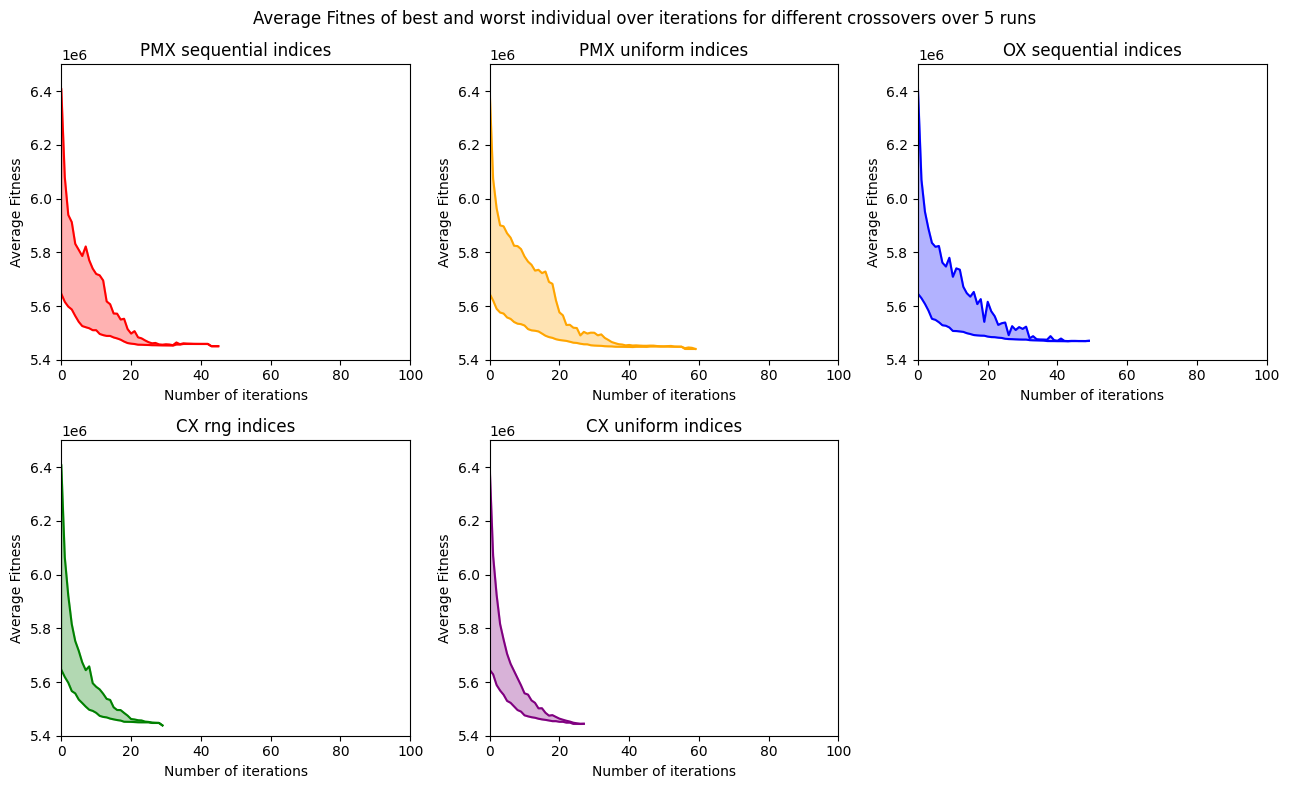

In [19]:
alltime_worst   = max([max(x) for x in all_worst_overtime])
alltime_best    = min([min(x) for x in all_best_overtime])

ylim_min = round_to_multiple(alltime_best,  100000, int)
ylim_max = round_to_multiple(alltime_worst, 100000, ceil)


fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(13, 8))


for i in range(ncols * nrows - len(setups)):
    i += len(setups)

    fig.delaxes(axes[i // ncols, i % ncols])

for i, (setup_name, best_overtime, worst_overtime, color) in enumerate(zip(setups.keys(), all_best_overtime, all_worst_overtime, colors)):
    ax = axes[i // ncols, i % ncols]
    
    ax.plot(best_overtime,  color=color)
    ax.plot(worst_overtime, color=color)
    ax.fill_between(np.arange(len(best_overtime)), best_overtime, worst_overtime, color=color, alpha=0.3)

    ax.set_ylabel("Average Fitness")
    ax.set_xlabel("Number of iterations")
    ax.set_xlim(0, exp_cfg.max_gen)
    ax.set_ylim(ylim_min, ylim_max)
    ax.set_title(setup_name)

plt.suptitle(f"Average Fitnes of best and worst individual over iterations for different crossovers over {exp_cfg.n_experiments} runs")
fig.tight_layout()
plt.show()

In [21]:
all_best_overtime

[[5645698.0,
  5615571.8,
  5597786.0,
  5587286.4,
  5563034.4,
  5541151.6,
  5525497.0,
  5521154.4,
  5517242.0,
  5510079.6,
  5510071.8,
  5496072.4,
  5491628.6,
  5488731.6,
  5488646.8,
  5483032.4,
  5479402.2,
  5474712.6,
  5467660.6,
  5462136.2,
  5459974.0,
  5458517.8,
  5456074.2,
  5455818.6,
  5455202.2,
  5454868.2,
  5454186.6,
  5454071.2,
  5453759.8,
  5453437.2,
  5453321.2,
  5453161.0,
  5452868.4,
  5456739.0,
  5456708.666666667,
  5458825.0,
  5458825.0,
  5458825.0,
  5458825.0,
  5458825.0,
  5458806.0,
  5458806.0,
  5458806.0,
  5450527.0,
  5450527.0,
  5450527.0],
 [5645698.0,
  5620491.6,
  5589545.2,
  5575812.0,
  5572049.0,
  5557439.6,
  5552223.0,
  5540560.4,
  5534326.0,
  5532546.6,
  5527540.0,
  5514154.6,
  5509504.2,
  5508012.2,
  5505404.2,
  5497598.4,
  5489444.4,
  5484420.0,
  5481521.6,
  5476460.2,
  5473582.8,
  5471902.8,
  5470173.4,
  5467010.2,
  5463592.2,
  5462483.4,
  5459664.2,
  5457633.6,
  5457424.4,
  5453948.6,
  5

In [ ]:
pd.Dataframe({
    ""
})

In [ ]:
# #iterations and time for pop size (avg 5 runs)

color1, color2 = "darkcyan", "purple"


    fig, ax1 = plt.subplots()
    plt.xscale(scale)
    plt.xlabel("Population size")

    ax1.plot(pop_sizes, all_iterations, color=color1, marker="x")
    ax1.set_ylabel("#iterations", color=color1)
    ax1.tick_params(axis="y", labelcolor=color1)




    ax2 = ax1.twinx()


    ax2.plot(pop_sizes, all_total_times, color=color2, marker="x")
    ax2.set_ylabel("time (s)", color=color2)
    ax2.tick_params(axis="y", labelcolor=color2)




    plt.suptitle(f"Number of iterations and duration of runs for different population size (average of {exp_cfg.n_experiments} runs)")
    plt.show()